In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#  Import and read Australian Vehicle Prices.csv
Vehicleprices_df = pd.read_csv("Australian Vehicle Prices.csv")
Vehicleprices_df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [119]:
# Copying original dataset
dataset = Vehicleprices_df.copy()
dataset.tail()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888
16733,Mercedes-Benz,2021.0,C200,Sedan,2021 Mercedes-Benz C200,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,7 L / 100 km,31852,Gold / -,"Yatala, QLD",4 cyl,Sedan,4 Doors,5 Seats,65888


In [120]:
Brands = dataset['Price'].value_counts().reset_index()
Brands.tail() 

,index,Price
3789,40670,1
3790,315888,1
3791,25399,1
3792,69388,1
3793,35280,1


In [121]:
# CLEANING DATASET

# Extrating information needed from columns
pattern = r',(.*)'
dataset['State'] = dataset['Location'].str.extract(pattern)# Extrating state from location column
dataset['Litres'] = dataset['Engine'].str.extract(pattern) # Extrating litres from engine column
dataset['Litres'] = dataset['Litres'].str.strip()
pattern_1 = r'^(.*?) '
dataset['Litres'] = dataset['Litres'].str.extract(pattern_1) # Extrating litres from engine column

# Drop Columns that are not going to be used
columns_to_drop = ['Seats','Doors','ColourExtInt','DriveType','Title','FuelConsumption','Location','FuelType','Engine','CylindersinEngine','Model','BodyType','State','Car/Suv']
dataset = dataset.drop(columns=columns_to_drop)

# Dropping rows with values irrelevant to this application
dataset = dataset[dataset['UsedOrNew'] != 'DEMO']
dataset = dataset[dataset['Transmission'] != '-']
dataset = dataset[(dataset['Kilometres'] != '- / -') & (dataset['Kilometres'] != '-')]
dataset = dataset[dataset['Price'] != 'POA']

# Dropping rows with null values
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

# Changing format of year to integer
dataset['Year'] = dataset['Year'].astype(int)
dataset['Kilometres'] = dataset['Kilometres'].astype(int)
#dataset['Price'] = dataset['Price'].astype(int)
dataset['Litres'] = dataset['Litres'].astype(float)

# Printing results
print(dataset.info())
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13959 entries, 0 to 13958
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         13959 non-null  object 
 1   Year          13959 non-null  int32  
 2   UsedOrNew     13959 non-null  object 
 3   Transmission  13959 non-null  object 
 4   Kilometres    13959 non-null  int32  
 5   Price         13959 non-null  object 
 6   Litres        13959 non-null  float64
dtypes: float64(1), int32(2), object(4)
memory usage: 654.5+ KB
None


,Brand,Year,UsedOrNew,Transmission,Kilometres,Price,Litres
13954,Nissan,2009,USED,Automatic,182254,16000,2.5
13955,Hyundai,2015,USED,Automatic,54359,21450,1.6
13956,Nissan,2021,USED,Automatic,32977,36770,2.0
13957,Mercedes-Benz,2016,USED,Automatic,85525,41888,2.0
13958,Mercedes-Benz,2021,USED,Automatic,31852,65888,2.0


In [122]:
# Look at BRAND value counts for binning
Brands = dataset['Brand'].value_counts().reset_index()
Brands.head(10) 

,index,Brand
0,Toyota,2269
1,Hyundai,1112
2,Holden,1024
3,Mazda,999
4,Ford,967
5,Mitsubishi,939
6,Nissan,820
7,Kia,757
8,Volkswagen,692
9,Mercedes-Benz,526


In [123]:
# Choose a cutoff value and create a list of Brand types to be replaced
Brand_types_to_replace = []

Brand_types_to_replace = Brands[Brands['Brand'] <=100]['index']

# Replace in dataframe
for Brands in Brand_types_to_replace:
    dataset['Brand'] = dataset['Brand'].replace(Brands,"Other")

# Check to make sure binning was successful
dataset['Brand'].value_counts()

Toyota           2269
Hyundai          1112
Holden           1024
Mazda             999
Ford              967
Mitsubishi        939
Nissan            820
Other             758
Kia               757
Volkswagen        692
Mercedes-Benz     526
Subaru            516
BMW               381
Audi              369
Honda             322
Jeep              269
Suzuki            235
MG                221
Land              195
Isuzu             172
Lexus             148
Renault           140
GWM               128
Name: Brand, dtype: int64

In [124]:
# checking the number of rows and columns
dataset.shape

(13959, 7)

In [125]:
# checking the number of missing values
dataset.isnull().sum()

Brand           0
Year            0
UsedOrNew       0
Transmission    0
Kilometres      0
Price           0
Litres          0
dtype: int64

In [126]:
# checking the distribution of categorical data
print(dataset['Transmission'].value_counts())
print(dataset['UsedOrNew'].value_counts())



Automatic    12265
Manual        1694
Name: Transmission, dtype: int64
USED    13451
NEW       508
Name: UsedOrNew, dtype: int64


In [127]:

# encoding "UsedOrNew" Column
dataset.replace({'UsedOrNew':{'USED':0,'NEW':1}},inplace=True)

# encoding "Transmission" Column
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)



In [128]:
dataset.head()

,Brand,Year,UsedOrNew,Transmission,Kilometres,Price,Litres
0,MG,2022,0,1,16,19990,1.5
1,BMW,2022,0,1,8472,108988,2.0
2,Mercedes-Benz,2011,0,1,136517,32990,5.5
3,Renault,2022,0,1,1035,34990,1.3
4,Land,2017,0,1,67662,62280,2.0


In [129]:
# Splitting the data and Target
X = dataset.drop(['Brand','Price'],axis=1)
Y = dataset['Price']

In [130]:
print(X)

       Year  UsedOrNew  Transmission  Kilometres  Litres
0      2022          0             1          16     1.5
1      2022          0             1        8472     2.0
2      2011          0             1      136517     5.5
3      2022          0             1        1035     1.3
4      2017          0             1       67662     2.0
...     ...        ...           ...         ...     ...
13954  2009          0             1      182254     2.5
13955  2015          0             1       54359     1.6
13956  2021          0             1       32977     2.0
13957  2016          0             1       85525     2.0
13958  2021          0             1       31852     2.0

[13959 rows x 5 columns]


In [131]:
print(Y)

0         19990
1        108988
2         32990
3         34990
4         62280
          ...  
13954     16000
13955     21450
13956     36770
13957     41888
13958     65888
Name: Price, Length: 13959, dtype: object


In [132]:
# Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## Model Training

In [133]:

# loading the linear regression model
lin_reg_model = LinearRegression()


In [134]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation
## 1.Linear Regression

In [135]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [136]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4194983444650705


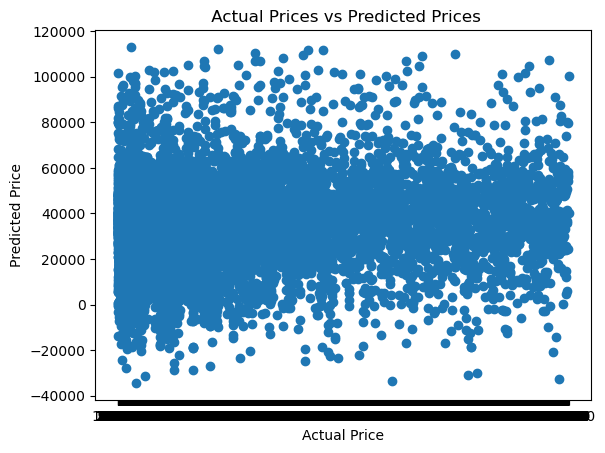

In [137]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [138]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [139]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.45482283883228836


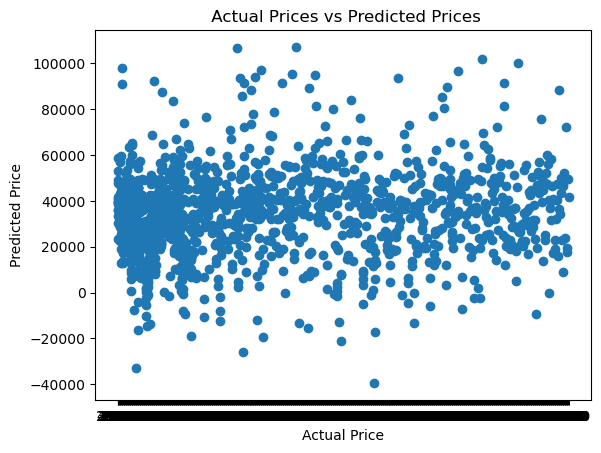

In [140]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## 2. Lasso Regression

In [141]:
# loading the linear regression model
lass_reg_model = Lasso()

In [142]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

## Model Evaluation

In [143]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [144]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.419498286636412


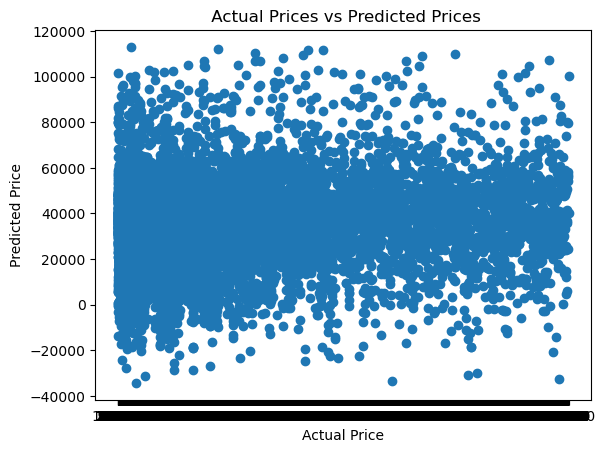

In [145]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [146]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [147]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4548226921587982


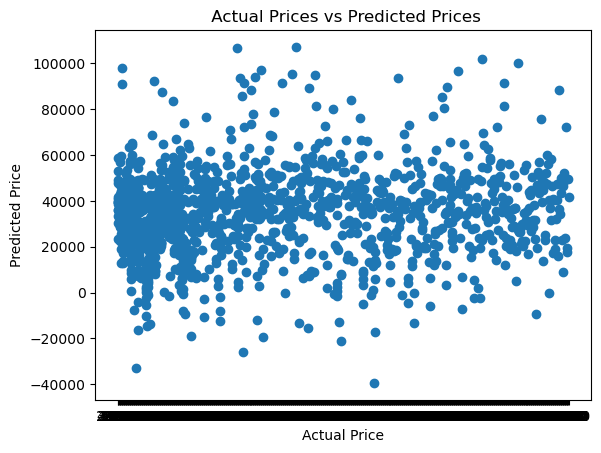

In [148]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()